1.
(a)The following code generate 10,000 Uniform distributed random number:

mean:  0.5015954347987638
std:  0.28936371860979276


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in int_scalars


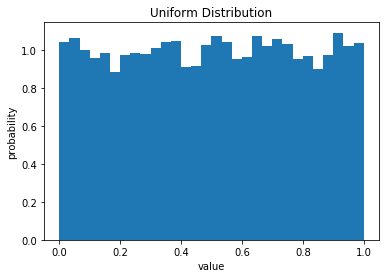

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

#1--------------------------------
#Set random number generators 
a = 7**5
b = 0
m = 2**31-1

#Creat a list to store random numbers with U[0,1]
unif = [None] * 10001
unif[0] = 1

#This loop is for generating random numbers with U[0,1]
i = 1
while i < 10001:
    unif[i] = np.mod(a*unif[i-1]+b,m)
    i = i+1
unif = [x/m for x in unif]

#Delete the first observation x_0 and keep x_1 to x_10000
del unif[0]

#Draw the histogram of the sample uniform distribution
plt.figure()
ax1 = plt.hist(unif, normed = True, bins = 30)
plt.title("Uniform Distribution")
plt.ylabel("probability")
plt.xlabel("value")

print("mean: ", np.mean(unif))
print("std: ", np.std(unif))

(b)built in function results:

In [3]:
#Use built-in function to generate uniform distribution
build = np.random.uniform(0,1,10000)
print("build in function mean: ", np.mean(build))
print("build in function std: ",np.std(build))


build in function mean:  0.5020738374619756
build in function std:  0.28693499755277346


(c) Comparing part(a) and part(b), we can tell that the simulation gets a very similar mean and standard deviation as the biult in function does

2.
(a)Generate 10,000 random numbers with following distribution

\begin{equation}
  X = \begin{cases}
    -1 & \text{with probability 0.30} \\
    0 & \text{with probability 0.35} \\
    1 & \text{with probability 0.20} \\
    2 & \text{with probability 0.15}
  \end{cases}
\end{equation}

In [5]:
#2-----------------------------------
#Creat a list to store random numbers from the discrete distribution
dist = [None] * 10000

#Set probabilities for different outcomes from the distribution
p1 = 0.3; p2 = 0.35; p3 = 0.2; p4 = 0.15

#This loop is for generating the discrete distribution
i = 0
while i < 10000:
    if unif[i] <= p1:
        dist[i] = -1
    elif p1 < unif[i] <= p1+p2:
        dist[i] = 0
    elif p1+p2 < unif[i] <= p1+p2+p3:
        dist[i] = 1
    elif p1+p2+p3 < unif[i] <= p1+p2+p3+p4:
        dist[i] = 2
    i = i + 1

(b)Draw the histogram and calculate mean and standard deviation:

mean:  0.2085
std:  1.0309353762481916


Text(0.5, 0, 'value')

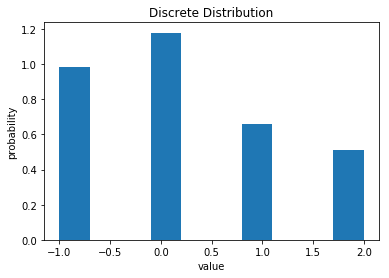

In [6]:
print("mean: ", np.mean(dist))
print("std: ", np.std(dist))

#Draw the histogram
plt.figure()
ax2 = plt.hist(dist, normed = True)
plt.title("Discrete Distribution")
plt.ylabel("probability")
plt.xlabel("value")

3.
(a)Generate 1,000 random numbers with Binomail distribution with n = 44 and p = 0.64

In [7]:
#3-----------------------------------
#Set seed so that each time we can gerenate the same sequence 
#of random numbers for each loop that is used to generate
#binomial random numbers
#By setting such a seed, our result will be consistent and easy
#to study with
random.seed(9)

#Creat a list to store random numbers from the bernoulli distribution
ber = [None] * 44
p = 0.64

#Creat a list to store random numbers from the binomail distribution
B = [None]*1000

#This loop will generate 1000 binomially distributed random numbers
x = 1
while x < 1001:
    u = [None] * 45
    #generate random number for x_0 in each loop
    u[0] = random.randint(1,100)
    #generate a set of 44 uniformly distributed random numbers
    #each set of these numbers will generate 1 random number
    #with Binomial(44,0.64)
    i = 1
    while i < 45:
        u[i] = np.mod(a*u[i-1]+b,m)
        i = i+1
    del u[0]
    j = 0
    while j < 44:
        if u[j]/m <= p:
            ber[j] = 1
        else:
            ber[j] = 0
        j = j + 1
    B[x-1] = sum(ber)
    x = x + 1

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in int_scalars


(b)Draw histogram

Text(0.5, 0, 'value')

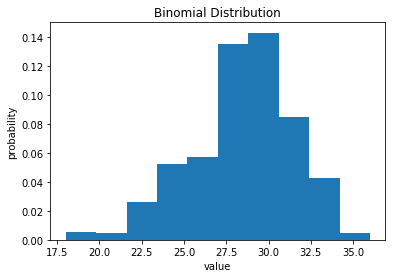

In [9]:
#Draw the histogram
plt.figure()
ax3 = plt.hist(B, normed = True)
plt.title("Binomial Distribution")
plt.ylabel("probability")
plt.xlabel("value")

Compute P(X $\geq$ 40)

In [10]:
#Compute P(X>=40)
P = sum(1 for i in B if i >= 40)

#Compute theoretical value of P(X>=40) to compare with the empirical result
k = 40
n = 44
P_T = 0
while k < 45:
    P_true = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))* \
             (p**k)*((1-p)**(n-k))
    P_T = P_T + P_true
    k = k + 1
print("Empirical probability =", P)
print("Theoretical Probability =", P_T,"is approximately 0")

Empirical probability = 0
Theoretical Probability = 4.8236638455676785e-05 is approximately 0


From above comparision, we can tell that P(X $\geq$ 40)
computed from sample and from theoretical formula are approximately the same 

4.
(a)Generate 10,000 Exponentially distributed random numbers with $\lambda$ = 1.5

In [12]:
lam = 1.5

#Use the uniform distributed random numbers created in question 1
#to generate a exponential distribution
U_4 = [1-x for x in unif]
X_4 = -1/lam*np.log(U_4)

(b)Compute P(X $\geq$ 1) and P(X $\geq$ 4)

In [14]:
#Compute P(X>=1) and P(X>=4)
P_1 = sum(1 for i in X_4 if i >= 1)/10000
P_4 = sum(1 for i in X_4 if i >= 4)/10000
print("P(X >= 1) =", P_1)
print("P(X >= 4) =", P_4)

P(X >= 1) = 0.2223
P(X >= 4) = 0.002


(c)Compute empirical mean and standard deviation

mean = 0.670837071558907 , std = 0.668062748295854


Text(0.5, 0, 'value')

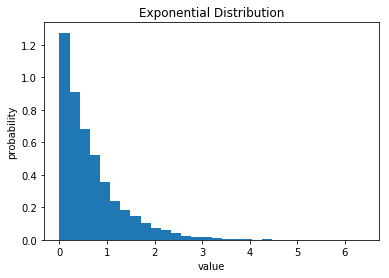

In [15]:
mu_4 = np.mean(X_4)
sigma_4 = np.std(X_4)
print("mean =", mu_4, ", std =", sigma_4)
#Draw the histogram
plt.figure()
ax4 = plt.hist(X_4, normed = True, bins = 30)
plt.title("Exponential Distribution")
plt.ylabel("probability")
plt.xlabel("value")

5.
(a)Generate 5,000 Uniformly distributed random numbers

In [16]:
#5-------------------------------------------------
#Creat a function that can generate random number with U[0,1]
#with sample size n and initial value x_0
def f_unif(n,x_0):
    U = [None] * (n+1)
    U[0] = x_0
    i = 1
    while i < (n+1):
        U[i] = np.mod(a*U[i-1]+b,m)
        i = i+1
    del U[0]
    U = [x/m for x in U]
    return U

#Generate a uniform distribution with 5000 observations and x_0 = 1
U_5 = f_unif(n = 5000, x_0 = 1)

D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in int_scalars
  if __name__ == '__main__':


(b)Generate 5,000 Normally distributed numbers by Box-Muller Method

In [19]:
#Creat 2 lists with length 2500 each
#These 2 lists will be used to store normally distributed random numbers
Z_1 = [None]*2500
Z_2 = [None]*2500

#Here we used Box-Muller Method
for i in range(2500):
    Z_1[i] = np.sqrt(-2*np.log(U_5[2*i]))*np.cos(2*math.pi*U_5[2*i+1])
    Z_2[i] = np.sqrt(-2*np.log(U_5[2*i]))*np.sin(2*math.pi*U_5[2*i+1])
    i = i + 1

#Combine 2 lists to get a normal distribution with 5000 observations
Z_BM = Z_1+Z_2

(c)Compute empirical mean and standard deviation of above distribution, also generated histogram

In [20]:
mu_BM = np.mean(Z_BM)
std_BM = np.std(Z_BM)

print("Mox-Muller method: mean =", mu_BM, ", std =", std_BM)

Mox-Muller method: mean = 0.01586619963177707 , std = 0.9904473293620408


Text(0.5, 0, 'value')

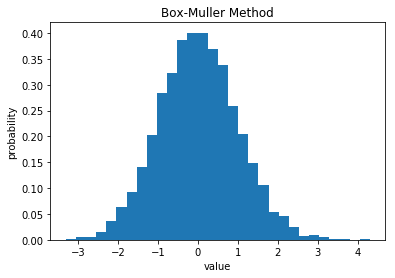

In [21]:
#Draw the histogram
plt.figure()
ax5 = plt.hist(Z_BM, normed = True, bins = 30)
plt.title("Box-Muller Method")
plt.ylabel("probability")
plt.xlabel("value")

(d)Generate 5,000 Normally distributed numbers by Polar-Marsaglia Method

In [22]:
#Here we used Polar-Marsaglia Method
Z_1_1 = [None]*2500
Z_2_2 = [None]*2500
for i in range(2500):
    V_1 = 2*U_5[2*i]-1
    V_2 = 2*U_5[2*i+1]-1
    W = V_1**2+V_2**2
    #drop V_1 and V_2 if W <= 1
    if W <= 1:
        Z_1_1[i] = np.sqrt((-2*np.log(W))/W)*V_1
        Z_2_2[i] = np.sqrt((-2*np.log(W))/W)*V_2
Z_PM = Z_1_1 + Z_2_2
Z_PM = [x for x in Z_PM if x != None]
#Notice that this method will generate less than 5000 observations

(e)Compute empirical mean and standard deviation of above distribution, also generated histogram

In [23]:
mu_PM = np.mean(Z_PM)
std_PM = np.std(Z_PM)

print("Polar-Marsaglia method: mean =", mu_PM, ", std =", std_PM)

Polar-Marsaglia method: mean = 0.025241381616694033 , std = 1.0109944380282085


Text(0.5, 0, 'value')

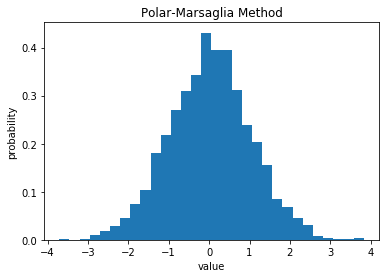

In [24]:
#Draw the histogram
plt.figure()
ax6 = plt.hist(Z_PM, normed = True, bins = 30) 
plt.title("Polar-Marsaglia Method")
plt.ylabel("probability")
plt.xlabel("value")

(f)Compare execution time for using different methods

  In order to compare execution time better, we will generate
  2 normal distributions by using different methods with the 
  same sample size.

In [73]:
#Now we want to compare time efficiency of the two methods

#The following uniform distribution is used to generate
#2 normal distributions each with 5000 observations
#by using different methods
U_5_test = f_unif(10000,2)

Z_1_test = [None]*2500
Z_2_test = [None]*2500

#Box-Muller Method
#Record starting time
start_time1 = time.time()
for i in range(2500):
    Z_1_test[i] = np.sqrt(-2*np.log(U_5_test[2*i]))* \
                  np.cos(2*math.pi*U_5_test[2*i+1])
    Z_2_test[i] = np.sqrt(-2*np.log(U_5_test[2*i]))* \
                  np.sin(2*math.pi*U_5_test[2*i+1])
    i = i + 1

#Record ending time and compute time used
time_1 = (time.time() - start_time1)
print("--- %s seconds ---" % time_1)

Z_1_1_test = [None]*2500
Z_2_2_test = [None]*2500

#Record starting time
start_time2 = time.time()
x = 0
for i in range(10000):
    V_1 = 2*U_5_test[2*i]-1
    V_2 = 2*U_5_test[2*i+1]-1
    W = V_1**2+V_2**2
    if W <= 1:
        Z_1_1_test[x] = np.sqrt((-2*np.log(W))/W)*V_1
        Z_2_2_test[x] = np.sqrt((-2*np.log(W))/W)*V_2
        x = x + 1
    #when Z_1_1_test and Z_2_2_test both contain 2500 observations, exit loop
    if x > 2499:
        break

#Record ending time and compute time used
time_2 = (time.time() - start_time2)
print("--- %s seconds ---" % time_2)

print("Box-Muller takes", time_1, "seconds.")
print("Polar-Marsaglia takes", time_2, "seconds.")

--- 0.020933866500854492 seconds ---
--- 0.018950223922729492 seconds ---
Box-Muller takes 0.020933866500854492 seconds.
Polar-Marsaglia takes 0.018950223922729492 seconds.


D:\anaconda_distribution\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in int_scalars
  if __name__ == '__main__':


It looks like Box-Muller method takes longer time than Polar-Marsaglia method does.
Thus, the Polar-Marsaglia method is more efficient.
The reseaon is that the Box-Muller method uses trigonometirc functions to generate randon number
while the Polar-Marsaglia method only need to do some simple calculation.
Trigonometric functions are known to be time-consumming functions.